## 03.

### Laplace equation
* Laplacian operator
  - A second-order differentiation
    $$\nabla^2=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2} $$
* Laplace equation
  - For a function, $\phi(r)$, the Laplace equation reads
    $$\nabla^2\phi(r)=0 $$
  - Of course, we need boundary conditions.
* Its application?
  - In this course, it is closely related to the Poisson equation
### Analytic solution
* Consider the 1D structure, $[0,a]$.
  - The boundary conditins for $\phi(x)$ are given by $\phi(0)=0$ and $\phi(a)=1$
* It is easy to solve it
  - In the 1D structure,
    $$\frac{d^2}{dx^2}\phi=0 $$
  - The solution has the form of $\phi(x)=C_1 x + C_0$
  - Using the boundary conditions, it is found that $\phi(x)=x/a$
### Solution vector
* Let us construct a matrix equation corresponding to the Laplace equation
  - We assign N points. They are uniformly distributed. For the i-th point, it has the coordinate of
    $$Matlab,\ x_i=\frac{i-1}{N-1}a. \quad Python,\ x_i=\frac{i}{N-1}a$$
  - The solution function, $\phi(x)$, can be approximated by
    $$[\phi(x_1)\ \phi(x_2) \cdots \phi(x_{N-1})\ \phi(x_N)]^T $$
  - Therefore, N equations are needed to determine the solution vector
  - Remember that the Lapladian operator is involved.
### Discretization
* How to assign N equations
  - For $2\le i \le N-1$, the discretized Laplacian operator is used.
    $$\left. \frac{d^2 \phi}{dx^2} \right|_{x=x_i}\approx\frac{\phi(x_{i+1})-2\phi(x_i)+\phi(x_{i-1})}{\Delta x^2}=0 $$
  - The Laplace equation at x=x_i can be written as
$$\frac{1}{(\Delta x)^2}[0 \cdots 1 -2\ 1 \cdots 0]
\begin{bmatrix}
\phi(x_1)\\ \cdots \\ \phi(x_{i-1})\\ \phi(x_i) \\ \phi(x_{i+1}) \\ \cdots \\ \phi(x_N)
\end{bmatrix}
=[0]
$$
### Boundary condition
* How to assign N equations(continued)
  - For i=1 or i=N, the boundary condition is applied.
  - For example, for i=N, the boundary condition can be written in a matrix form:
$$[0 \cdots 0 0 0 \cdots \textcolor{red}{1}]
\begin{bmatrix}
\phi(x_1)\\ \cdots \\ \phi(x_{i-1})\\ \phi(x_i) \\ \phi(x_{i+1}) \\ \cdots \\ \phi(x_N)
\end{bmatrix}
=[\textcolor{red}{1}]
$$
### N-5 example
* Let us collect the previous results explicitly
  - It is simply given by
$$Ax = 
\begin{bmatrix}
\textcolor{red}{1} & 0 & 0 & 0 & 0 \\
\textcolor{red}{1} & \textcolor{red}{-2} & \textcolor{red}{1} & 0 & 0 \\
0 & \textcolor{red}{1} & \textcolor{red}{-2} & \textcolor{red}{1} & 0 \\
0 & 0 & \textcolor{red}{1} & \textcolor{red}{-2} & \textcolor{red}{1} \\
0 & 0 & 0 & 0 & \textcolor{red}{1} 
\end{bmatrix}
\begin{bmatrix}
\phi(x_1) \\ \phi(x_2) \\ \phi(x_3) \\ \phi(x_4) \\ \phi(x_5)
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ \textcolor{red}{1}
\end{bmatrix}
=
b
$$ 
  - How can we solve it numerically?
### python
* Step by step procedure
  - set the matrix, A
  - set the vector, b
  - Finally, get the solution vector, x
### Generalized Poisson equation?
* Laplace equation
  $$\nabla^2f(r)=0 $$
* Poisson equation
  $$\nabla^2f(r)=s(r) $$
  - Here, s(r) is the source function
  - Therefore, the source-free Poisson equation is the Laplace equation.
* Then, why do we consider the "generalized" Poisson equations?
  - What is the exact meaning of the generalization?
### Derivation
* One of the four Maxwell equations
  $$\nabla \cdot D = \rho(r) $$
  $D(r) $: Displacement vector, which is given by $\epsilon(r)E(r)$   
  $E(r) $: Electric field   
  $\epsilon(r) $: Permittivity (assumed as a scalar)   
  $\rho(r) $: Net charge density   
* Under the electrostatic approximation, $E(r)=-\nabla \phi(r)$
  - Using the above expression, it is found that
    $$\nabla \cdot [\epsilon(r)\nabla\phi(r)]=-\rho(r) $$
  - The above equation is (incorrectly) called as the **"Poisson equation"**.
### Problem
* 1. a simple code for solving the Laplace equation. In this case, apply $\phi(0)=1$ and $\phi(a)=-1$.   
    Analytic solution: $\phi(x)=-2x/a+1$   
    Discretization (N-3): $\nabla^2\phi(x) \rightarrow $
$$\nabla^2 = \frac{1}{(\Delta x)^2}
\begin{bmatrix}
-2 & 1 & 0 \\
1 & -2 & 1 \\
0 & 1 & -2
\end{bmatrix}
$$


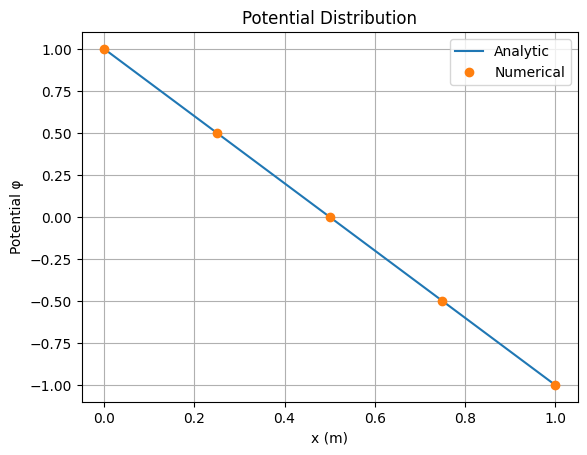

In [23]:
from constant import q,m0,kB,k,epsilon_si,epsilon_ox,epsilon0,nint,T,kT,h,hbar,m
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh

a=1
N=5
dx=a/(N-1)
A=np.zeros((N,N))
b=np.zeros(N)
for i in range(N):
    if i==0 or i==N-1:
        A[i,i]=1
    else:
        A[i,i-1]=1; A[i,i]=-2; A[i,i+1]=1
b[0]=1
b[N-1]=-1

phi=np.linalg.solve(A,b)
#x=np.arange(0, a+dx/2, dx)
x=np.linspace(0, a, N)

# Exact solution
phi_analytic= -2*x/a+1

# Plotting
plt.plot(x, phi_analytic, label='Analytic')
plt.plot(x, phi, 'o', label='Numerical')
plt.xlabel('x (m)'), plt.ylabel('Potential φ'), plt.title('Potential Distribution')
plt.legend(), plt.grid(True)
plt.show()

* 2. a simple code for solving
  $$\frac{d^2}{dx^2}\phi=\delta(x-\frac{a}{2}) $$
  in this case, apply $\phi(0)=0$ and $\phi(a)=0$.
  - Poisson equation: $\nabla^2\phi(x)=\delta(x-\frac{a}{2}) $   
    The Dirac delta function is located at the center $a/2$. Since we should represent it numerically,   
    we need to make it finitely exists. First, the integral of delta function from $-\infty$ to $\infty$ is one:   
    $\int \delta(x) dx=1$. Second, we have N points in the x range. Thus we could represent Dirac delta function as,
$$\delta(x) \simeq
\begin{cases}
N & for \quad x=\frac{a}{N}, \frac{a+1}{N} \\
0 & ,else
\end{cases}
$$
* Now we consider anlytical solution. The difference of the derivative at x=a and x=0 is 1. That is because . . .
  $$\int dx \nabla^2\phi(x)=\int dx \delta(x-a/2) = 1 $$
  $$\frac{d\phi}{dx_{x=a}}-\frac{d\phi}{dx_{x=0}} $$
* By the way, if the range of the integral is out of delta function, the difference of the derivative must be same . .  .
  $$\frac{d\phi}{dx_{x<a/2}}-\frac{d\phi}{dx_{x'<2/a}} $$
* Therefore, analytical solution is :
  $$\phi(x)=-\frac{1}{2}x, (0<x<1/2) $$
  $$=\frac{1}{2}x-\frac{1}{2},\quad(1/2<x<1) $$

* Potential Graph

$$A = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 1 
\end{bmatrix},\quad
b=(\Delta x)^2
\begin{bmatrix}
0 \\
0 \\
\delta(x-a/2) \\
0 \\
0  
\end{bmatrix}
$$ 
* Analytical solution is required to compare
  $$\int_0^a \frac{d^2}{dx^2}\phi(x)dx = \left.\frac{d}{dx}\phi(x) \right|_{x=a} - \left.\frac{d}{dx}\phi(x) \right|_{x=0}=\int_0^a \delta \left(x-\frac{a}{2} \right)dx=1  $$
* Since the graph is symmetric,
  $$\left.\frac{d}{dx}\phi(x)\right|_{x=a}=\frac{1}{2},\quad \left.\frac{d}{dx}\phi(x)\right|_{x=0}=-\frac{1}{2} $$
  $$\phi\left(\frac{a}{2}\right)=-\frac{a}{4} $$
$$\phi(x)=
\begin{cases}
-\frac{1}{2}x, & x \le \frac{a}{2} \\
\frac{1}{2}x-\frac{a}{2}, & x \ge \frac{a}{2}
\end{cases}
$$

3


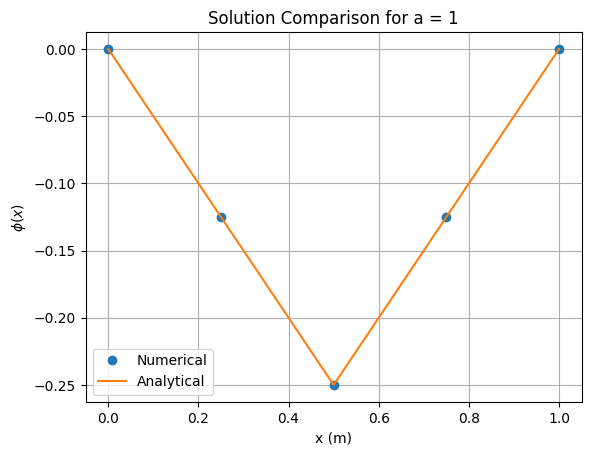

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1  # Length of the device
N = 5   # Number of grid points
dx = a / (N - 1)

# Initialize matrix A and vector b
A = np.zeros((N, N))
b = np.zeros(N)
#middle_index = (N + 1) // 2  # Center index
middle_index = (N+1) // 2  # Center index
print(middle_index)

# Fill matrix A and vector b
for ii in range(N):
    if ii == 0 or ii == N - 1:  # Boundary conditions
        A[ii, ii] = 1
    elif ii == middle_index-1:  # Center point (delta function)
        A[ii, ii - 1] = 1
        A[ii, ii] = -2
        A[ii, ii + 1] = 1
        b[ii] = 1 / dx * (dx**2)
    else:  # Internal points
        A[ii, ii - 1] = 1
        A[ii, ii] = -2
        A[ii, ii + 1] = 1

# Solve the system A * phi = b
phi = np.linalg.solve(A, b)

# Exact solution
x = np.linspace(0, a, N)  # Generate x values

# Analytical solution for two regions
phi_analytic = np.zeros_like(x) # x 변수만큼의 0배열을 만든다.
for i in range(N):
    if x[i] < a / 2:
        phi_analytic[i] = -1/2 * x[i]
    else:
        phi_analytic[i] = 1/2 * x[i] - a / 2

# Plot results
plt.plot(x, phi, "o", label="Numerical")
plt.plot(x, phi_analytic, label="Analytical")
plt.xlabel("x (m)"), plt.ylabel("$\\phi(x)$"), plt.title(f"Solution Comparison for a = {a}")
plt.legend(), plt.grid(True)
plt.show()


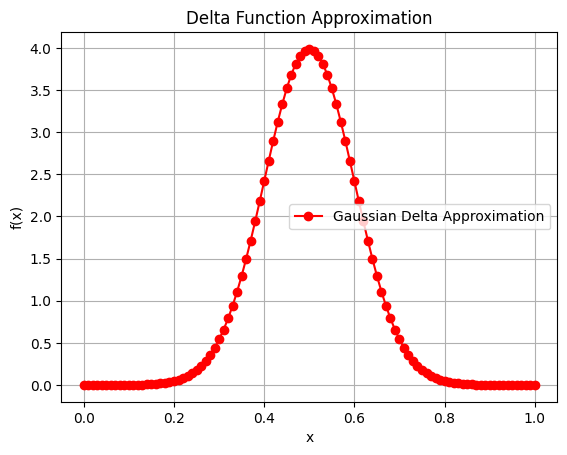

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian approximation of the delta function
def delta_function(x, center=0, width=0.001):
    """
    Gaussian approximation of Dirac delta function.
    
    Parameters:
    x (array-like): Input values.
    center (float): Center of the delta function.
    width (float): Standard deviation of the Gaussian.
    
    Returns:
    numpy.ndarray: Values of the Gaussian delta function.
    """
    return (1 / (width * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Create a range of x values
# 5, 19, 31
x = np.linspace(0, 1, 101)

# Generate the delta function
delta = delta_function(x, center=1/2, width=0.1)

# Plot the delta function
plt.plot(x, delta, "ro-", label="Gaussian Delta Approximation")
plt.title("Delta Function Approximation"), plt.xlabel("x"), plt.ylabel("f(x)")
plt.legend(), plt.grid(True)
plt.show()
